# Module 8: Working with Dates and Times Module

Working with datetime type enables us to extract a lot of information. For example, the quarters of a year (Q1,Q2,Q3,Q4)

But first, let's explore on Python built-in date and time.

In [1]:
import pandas as pd
import datetime as dt

Datetime is a built-in module.
This module is not imported automatically for every python file to conserve/save memory.
Hence, we need to import the module when we want to use it.
Datetime module has unique object, attributes, and method. We will learn the basics of Python Datetime before we learn Pandas Datetime format.


### 1. Review of Python's datetime Module
- An internal library that Python loads on demand. This is to conserve memory.
- Date() method creates an object to store a date. It can be year, month, day and etc.

**date() method**

Let's create a datetime object. The arguments are in order of year, month, and day.

*Hint : Shift + Tab to read about the method*


In [2]:
someday = dt.date(2016,4,12)
someday

datetime.date(2016, 4, 12)

We can directly call the following attributes from the object.

In [3]:
someday.day , someday.month , someday.year

(12, 4, 2016)

**datetime() method**

It is the same as date() method but with additional time parameter. The default values for the time ( hours and seconds ) are ( 0000h ) which is midnight.

In [4]:
dt.datetime(2016,4,12)

datetime.datetime(2016, 4, 12, 0, 0)

In [5]:
sometime = dt.datetime(2016,4,12, 8, 15)
sometime

datetime.datetime(2016, 4, 12, 8, 15)

Casting or changing the datetime object to string will give a readable date format.

In [6]:
str(someday)

'2016-04-12'

### 2. Pandas Timestamp Object
- Pandas version of Datetime
- If the user does not provide the specific time, the default values will be midnight ( 0000H )
- Pandas Datetime or Timestamp can do more analysis than Python Datetime module.


**pd.Timestamp()**
- argument can be Pandas Series or string.
- For string argument, Pandas can recognize separator which are either dash ( - ) , comma ( , ) or slash ( / )


In [7]:
pd.Timestamp("2016-4-12")

Timestamp('2016-04-12 00:00:00')

In [8]:
pd.Timestamp("4.12.2016")

Timestamp('2016-04-12 00:00:00')

In [9]:
pd.Timestamp("2016/4/12 12:12")

Timestamp('2016-04-12 12:12:00')

Pandas Datetime can also read Python Datetime objects.

In [10]:
someday

datetime.date(2016, 4, 12)

In [11]:
pd.Timestamp(someday)

Timestamp('2016-04-12 00:00:00')

### 3. The Pandas DateTimeIndex Object

- create dateTimeIndex object using DateTimeIndex() method
- Change string type into datetime data type

In [12]:
dates = ["2015-10-5", "2016-5-10", "2019-1-20"]

In [13]:
dtIndex = pd.DatetimeIndex(dates)
dtIndex

DatetimeIndex(['2015-10-05', '2016-05-10', '2019-01-20'], dtype='datetime64[ns]', freq=None)

We can also pass the Python Date/Datetime object to Pandas Datetime format.

In [14]:
dates2 = [dt.date(2015,10,5), dt.date(2016,5,10), dt.date(2019,1,20)]
pd.DatetimeIndex(dates2)

DatetimeIndex(['2015-10-05', '2016-05-10', '2019-01-20'], dtype='datetime64[ns]', freq=None)

Let's create a Pandas Series with Datetime as index.

In [15]:
values = [100,200,300]
pd.Series(values, dtIndex)

2015-10-05    100
2016-05-10    200
2019-01-20    300
dtype: int64

### 4. pd.to_datetime() method
- Converts existing data object into Pandas Datetime object.
- to_datetime() can convert strings, Python Date object and Pandas Series.

In [16]:
pd.to_datetime("2016-5-10")

Timestamp('2016-05-10 00:00:00')

In [17]:
pd.to_datetime(dt.date(2015,10,5))

Timestamp('2015-10-05 00:00:00')

In [18]:
pd.to_datetime(["2016-5-10", "2019-1-20", "July 12th 1998"])


DatetimeIndex(['2016-05-10', '2019-01-20', '1998-07-12'], dtype='datetime64[ns]', freq=None)

**Convert Pandas Series into Pandas Datetime object**

In [19]:
s = pd.Series(["2019-1-20", "July 12th 1998", "2016"])
s

0         2019-1-20
1    July 12th 1998
2              2016
dtype: object

In [20]:
pd.to_datetime(s)

0   2019-01-20
1   1998-07-12
2   2016-01-01
dtype: datetime64[ns]

**If we pass wrong format string to the method, it will prompt error**. 

However, we can fix the error by replacing it with NaT data, which means missing data. This can be done using the errors parameter by setting it to "coerce".

In [21]:
s = pd.Series(["2019-1-20", "July 12th 1998", "2016", "Hello World"])

In [22]:
pd.to_datetime(s)

ValueError: ('Unknown string format:', 'Hello World')

In [23]:
pd.to_datetime(s, errors="coerce")

0   2019-01-20
1   1998-07-12
2   2016-01-01
3          NaT
dtype: datetime64[ns]

**UNIX time**

Pandas can also read UNIX Time. Unix time (also known as POSIX time or UNIX Epoch time) is a system for describing a point in time.
It is the number of seconds that have elapsed since 00:00:00 Thursday, 1 January 1970, Coordinated Universal Time (UTC), minus leap seconds.

Try:https://www.epochconverter.com/

In [24]:
pd.to_datetime(1564880922, unit="s")

Timestamp('2019-08-04 01:08:42')

### 5. Create Range of Dates with the pd.date_range() Method
Requires at least 2 parameters, start and end:

- start : starting day
- end : upper bound for the day generated
- freq : how the internal is calculated. The default value is "D" which stands for Day. "2D" stands for 2 Days.

For full list of freq : https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases

**START + END + FREQ**

In [25]:
pd.date_range(start="2019-1-2", end="2019-1-10", freq="2D")

DatetimeIndex(['2019-01-02', '2019-01-04', '2019-01-06', '2019-01-08',
               '2019-01-10'],
              dtype='datetime64[ns]', freq='2D')

We can also generate days on weekdays or business days. This can be done by specifying freq= "B“.

In [26]:
pd.date_range(start="2019-1-2", end="2019-1-10", freq="B")

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10'],
              dtype='datetime64[ns]', freq='B')

Let's generate the dates of all Fridays on February 2020.

In [27]:
pd.date_range(start="1 Feb 2020", end="28 Feb 2020", freq="W-FRI")

DatetimeIndex(['2020-02-07', '2020-02-14', '2020-02-21', '2020-02-28'], dtype='datetime64[ns]', freq='W-FRI')

Generate ten days with 6 Hours interval.

In [28]:
pd.date_range(start="1 Feb 2020", end="10 Feb 2020", freq="6H")

DatetimeIndex(['2020-02-01 00:00:00', '2020-02-01 06:00:00',
               '2020-02-01 12:00:00', '2020-02-01 18:00:00',
               '2020-02-02 00:00:00', '2020-02-02 06:00:00',
               '2020-02-02 12:00:00', '2020-02-02 18:00:00',
               '2020-02-03 00:00:00', '2020-02-03 06:00:00',
               '2020-02-03 12:00:00', '2020-02-03 18:00:00',
               '2020-02-04 00:00:00', '2020-02-04 06:00:00',
               '2020-02-04 12:00:00', '2020-02-04 18:00:00',
               '2020-02-05 00:00:00', '2020-02-05 06:00:00',
               '2020-02-05 12:00:00', '2020-02-05 18:00:00',
               '2020-02-06 00:00:00', '2020-02-06 06:00:00',
               '2020-02-06 12:00:00', '2020-02-06 18:00:00',
               '2020-02-07 00:00:00', '2020-02-07 06:00:00',
               '2020-02-07 12:00:00', '2020-02-07 18:00:00',
               '2020-02-08 00:00:00', '2020-02-08 06:00:00',
               '2020-02-08 12:00:00', '2020-02-08 18:00:00',
               '2020-02-

Generating last day of every month in the year 2020.

**freq="M"** stands for Month.

In [29]:
pd.date_range(start="1 Jan 2020", end="31 Dec 2020", freq="M")

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31'],
              dtype='datetime64[ns]', freq='M')

**START + PERIODS + FREQ**

**periods parameter :** Number of dates we want to generate from starting date

For example, if we want to generate **25 days** from 12 July 1998, we need to specify the start parameter as "12 July 1998" and set ** periods parameter to 25.

In [30]:
pd.date_range(start="12 July 1998", periods=25, freq="D")

DatetimeIndex(['1998-07-12', '1998-07-13', '1998-07-14', '1998-07-15',
               '1998-07-16', '1998-07-17', '1998-07-18', '1998-07-19',
               '1998-07-20', '1998-07-21', '1998-07-22', '1998-07-23',
               '1998-07-24', '1998-07-25', '1998-07-26', '1998-07-27',
               '1998-07-28', '1998-07-29', '1998-07-30', '1998-07-31',
               '1998-08-01', '1998-08-02', '1998-08-03', '1998-08-04',
               '1998-08-05'],
              dtype='datetime64[ns]', freq='D')

We can also generate **25 Business days** ( Weekdays ) from 12 July 1998.

Since 12 July is Sunday, the dates will start counting on 13 July.

In [31]:
pd.date_range(start="12 July 1998", periods=25, freq="B")

DatetimeIndex(['1998-07-13', '1998-07-14', '1998-07-15', '1998-07-16',
               '1998-07-17', '1998-07-20', '1998-07-21', '1998-07-22',
               '1998-07-23', '1998-07-24', '1998-07-27', '1998-07-28',
               '1998-07-29', '1998-07-30', '1998-07-31', '1998-08-03',
               '1998-08-04', '1998-08-05', '1998-08-06', '1998-08-07',
               '1998-08-10', '1998-08-11', '1998-08-12', '1998-08-13',
               '1998-08-14'],
              dtype='datetime64[ns]', freq='B')

To generate 25 dates of the last days of every month, we use parameter freq="M".

In [32]:
pd.date_range(start="12 July 1998" , periods=25, freq="M")

DatetimeIndex(['1998-07-31', '1998-08-31', '1998-09-30', '1998-10-31',
               '1998-11-30', '1998-12-31', '1999-01-31', '1999-02-28',
               '1999-03-31', '1999-04-30', '1999-05-31', '1999-06-30',
               '1999-07-31', '1999-08-31', '1999-09-30', '1999-10-31',
               '1999-11-30', '1999-12-31', '2000-01-31', '2000-02-29',
               '2000-03-31', '2000-04-30', '2000-05-31', '2000-06-30',
               '2000-07-31'],
              dtype='datetime64[ns]', freq='M')

Generate 25 dates with interval of 12 Hours.

In [33]:
pd.date_range(start="12/7/1998", periods=25, freq="12H")

DatetimeIndex(['1998-12-07 00:00:00', '1998-12-07 12:00:00',
               '1998-12-08 00:00:00', '1998-12-08 12:00:00',
               '1998-12-09 00:00:00', '1998-12-09 12:00:00',
               '1998-12-10 00:00:00', '1998-12-10 12:00:00',
               '1998-12-11 00:00:00', '1998-12-11 12:00:00',
               '1998-12-12 00:00:00', '1998-12-12 12:00:00',
               '1998-12-13 00:00:00', '1998-12-13 12:00:00',
               '1998-12-14 00:00:00', '1998-12-14 12:00:00',
               '1998-12-15 00:00:00', '1998-12-15 12:00:00',
               '1998-12-16 00:00:00', '1998-12-16 12:00:00',
               '1998-12-17 00:00:00', '1998-12-17 12:00:00',
               '1998-12-18 00:00:00', '1998-12-18 12:00:00',
               '1998-12-19 00:00:00'],
              dtype='datetime64[ns]', freq='12H')

In [34]:
pd.date_range(start="12 July 1998" , periods=25, freq="M" )

DatetimeIndex(['1998-07-31', '1998-08-31', '1998-09-30', '1998-10-31',
               '1998-11-30', '1998-12-31', '1999-01-31', '1999-02-28',
               '1999-03-31', '1999-04-30', '1999-05-31', '1999-06-30',
               '1999-07-31', '1999-08-31', '1999-09-30', '1999-10-31',
               '1999-11-30', '1999-12-31', '2000-01-31', '2000-02-29',
               '2000-03-31', '2000-04-30', '2000-05-31', '2000-06-30',
               '2000-07-31'],
              dtype='datetime64[ns]', freq='M')

**END + PERIODS + FREQ**

We can specify the end dates and the number of periods we want, then it will generate a list of dates which will end before the end date.

For example, the code below will generate 10 dates with an interval of 1 day. The end date is 31 Dec 2019. Hence, the calculated starting date is 22 Dec 2019.

In [35]:
pd.date_range(end="31 Dec 2019", periods=10, freq="D")

DatetimeIndex(['2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', freq='D')

**Freq="MS"** means start of each months

Notice the last date is 1 Dec 2019, because our end date is 31 Dec 2019. Hence, dates after the end date will not be generated.

In [36]:
pd.date_range(end="31 Dec 2019", periods=10, freq="MS")

DatetimeIndex(['2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01',
               '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01',
               '2019-11-01', '2019-12-01'],
              dtype='datetime64[ns]', freq='MS')

### 6 .dt Accessor

In the previous chapter, we learned how to change a columns' data type from string to datetime. This is to enable us to do more operations on the date. 

Let's generate a list of dates and pass it into Pandas Series.

In [37]:
list_dates = pd.date_range(start="1-1-2019", end="10-1-2019", freq="B")

In [38]:
s = pd.Series(list_dates)
s.head()

0   2019-01-01
1   2019-01-02
2   2019-01-03
3   2019-01-04
4   2019-01-07
dtype: datetime64[ns]

In [39]:
len(s)

196

Now we have a list of dates in Pandas Series. We need to use **.dt** to access some of the attributes

**s.dt.day** will return the days from the Series. Since the Series is already in datetime type, we do not need to do additional operations.

In [40]:
s.dt.day.head()

0    1
1    2
2    3
3    4
4    7
dtype: int64

s.dt.is_quater_start will return a list of Booleans. It will return TRUE if the date is the first day of a quarter.

In [41]:
mask = s.dt.is_quarter_start
s[mask]

0     2019-01-01
64    2019-04-01
129   2019-07-01
195   2019-10-01
dtype: datetime64[ns]

Generating Business days/Weekday, will gives us the days from Monday to Friday.

In [42]:
s.dt.day_name()

0        Tuesday
1      Wednesday
2       Thursday
3         Friday
4         Monday
         ...    
191    Wednesday
192     Thursday
193       Friday
194       Monday
195      Tuesday
Length: 196, dtype: object

### 7.  Install Pandas-datareader library

pandas_datareader provides a consistent, simple API for you to collect data from these platforms. We can get stock prices for many companies.

- Open Anaconda Command Prompt
- Run command - **conda install pandas-datareader**
- wait until it is done


### 8. Import Financial Datasets with Pandas Data Reader Library


- Unfortunately,  Google finance and Morningstar have been deprecated due to massive changes in their API and there has been no stable replacement.
- Full documentation : https://pydata.github.io/pandas-datareader/stable

In [43]:
import pandas as pd
import datetime as dt
from pandas_datareader import data

### FRED (Federal Reserve Economic Data)

source : https://pydata.github.io/pandas-datareader/stable/remote_data.html#fred

From FRED Official WEbsite, https://fred.stlouisfed.org/series/CPIAUCSL
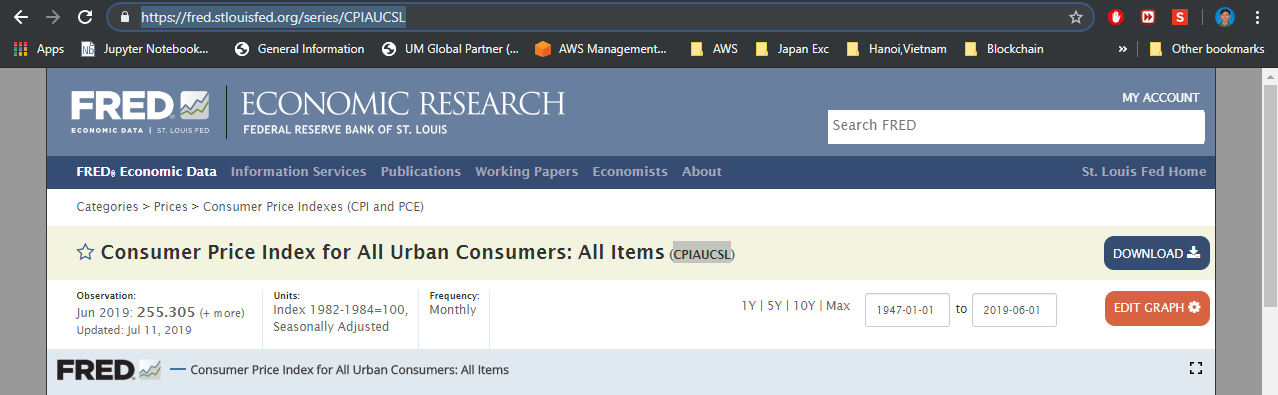

We can see the code on the right of the topic. To retrieve the data using Pandas DataReader, we need to use the code.

In [44]:
data.get_data_fred('CPIAUCSL')

,CPIAUCSL
DATE,
2014-11-01,236.983
2014-12-01,236.252
2015-01-01,234.718
2015-02-01,235.236
2015-03-01,236.005
2015-04-01,236.156
2015-05-01,236.974
2015-06-01,237.684
2015-07-01,238.053


In [45]:
from pandas_datareader import data 
start="1990-1-2"
end="2019-1-10"
gdp = data.DataReader('GDP', 'fred', start, end)
gdp

,GDP
DATE,
1990-04-01,5960.028
1990-07-01,6015.116
1990-10-01,6004.733
1991-01-01,6035.178
1991-04-01,6126.862
...,...
2018-01-01,20163.159
2018-04-01,20510.177
2018-07-01,20749.752


### Fama/French

source : https://pydata.github.io/pandas-datareader/stable/remote_data.html#fama-french

In [46]:
from pandas_datareader import data 
ds = data.DataReader('5_Industry_Portfolios', 'famafrench')
ds

{0:          Cnsmr  Manuf  HiTec  Hlth   Other
 Date                                      
 2014-11   6.26  -2.04   4.00   2.66   2.73
 2014-12   0.08   0.35  -1.38  -0.88   1.13
 2015-01  -0.72  -3.11  -3.63   1.56  -6.19
 2015-02   5.57   3.83   8.44   4.31   6.89
 2015-03  -0.49  -1.91  -2.40   0.84  -0.77
 2015-04  -1.05   1.79   1.77  -1.40   0.48
 2015-05   1.14  -1.16   1.79   4.88   1.73
 2015-06  -0.92  -3.07  -2.88   0.08  -0.32
 2015-07   4.20  -3.28   2.19   3.66   2.02
 2015-08  -5.00  -4.74  -6.40  -8.34  -6.18
 2015-09  -1.51  -3.96  -1.70  -7.29  -3.07
 2015-10   5.43   8.69   9.80   7.72   6.51
 2015-11   0.29  -0.08   0.57   0.72   1.20
 2015-12   0.13  -4.66  -2.59   0.38  -2.67
 2016-01  -3.30  -3.46  -5.05  -9.40  -8.23
 2016-02   0.51   1.39  -0.51  -1.06  -0.07
 2016-03   5.81   8.10   7.91   2.92   7.05
 2016-04  -0.13   3.49  -3.06   3.56   2.33
 2016-05   0.74  -0.19   4.08   2.47   0.93
 2016-06   1.73   2.65  -0.90   0.14  -2.70
 2016-07   2.46   1.21   6.65

In [47]:
ds.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 'DESCR'])

In [48]:
ds["DESCR"]

'5 Industry Portfolios\n---------------------\n\nThis file was created by CMPT_IND_RETS using the 201909 CRSP database. It contains value- and equal-weighted returns for 5 industry portfolios. The portfolios are constructed at the end of June. The annual returns are from January to December. Missing data are indicated by -99.99 or -999. Copyright 2019 Kenneth R. French\n\n  0 : Average Value Weighted Returns -- Monthly (59 rows x 5 cols)\n  1 : Average Equal Weighted Returns -- Monthly (59 rows x 5 cols)\n  2 : Average Value Weighted Returns -- Annual (5 rows x 5 cols)\n  3 : Average Equal Weighted Returns -- Annual (5 rows x 5 cols)\n  4 : Number of Firms in Portfolios (59 rows x 5 cols)\n  5 : Average Firm Size (59 rows x 5 cols)\n  6 : Sum of BE / Sum of ME (6 rows x 5 cols)\n  7 : Value-Weighted Average of BE/ME (6 rows x 5 cols)'

### World Bank

- Using wb.search, we can search any data that we want.
- To use it, we need to specify the keyword in a string. If we have multiple keywords, we can separate them with **"."** .
- Then, we can download the data using the ID column as a reference.

In [52]:
from pandas_datareader import wb
matches = wb.search('gdp')
matches

,id,name,unit,source,sourceNote,sourceOrganization,topics
641,5.51.01.10.gdp,Per capita GDP growth,,Statistical Capacity Indicators,GDP per capita is the sum of gross value added...,b'World Development Indicator (WDI) databank. ...,
643,6.0.GDP_current,GDP (current $),,LAC Equity Lab,GDP is the sum of gross value added by all res...,b'World Development Indicators (World Bank)',Economy & Growth
644,6.0.GDP_growth,GDP growth (annual %),,LAC Equity Lab,Annual percentage growth rate of GDP at market...,b'World Development Indicators (World Bank)',Economy & Growth
645,6.0.GDP_usd,GDP (constant 2005 $),,LAC Equity Lab,GDP is the sum of gross value added by all res...,b'World Development Indicators (World Bank)',Economy & Growth
646,6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation...",,LAC Equity Lab,GDP per capita based on purchasing power parit...,b'World Development Indicators (World Bank)',Economy & Growth
...,...,...,...,...,...,...,...
13449,UIS.XUNIT.GDPCAP.23.FSGOV,Initial government funding per secondary stude...,,Education Statistics,,b'',
13450,UIS.XUNIT.GDPCAP.23.FSHH,Initial household funding per secondary studen...,,Education Statistics,,b'',
13451,UIS.XUNIT.GDPCAP.3.FSGOV,Initial government funding per upper secondary...,,Education Statistics,"Average total (current, capital and transfers)...",b'UNESCO Institute for Statistics',
13452,UIS.XUNIT.GDPCAP.5T8.FSGOV,Initial government funding per tertiary studen...,,Education Statistics,,b'',


In [53]:
data = wb.download(indicator='6.0.GDP_usd',  start=1995, end=2010)

In [54]:
data

6.0.GDP_usd
country year              
Mexico  2010  9.534405e+11
        2009  9.063198e+11
        2008  9.514536e+11
        2007  9.385028e+11
        2006  9.091831e+11
        2005  8.663465e+11
        2004  8.408472e+11
        2003  8.062145e+11
        2002  7.949056e+11
        2001  7.938584e+11
        2000  7.986944e+11

### Historical data — Moscow Exchange 

In [55]:
from pandas_datareader import data 
f = data.DataReader('USD000UTSTOM', 'moex', start='2017-07-01', end='2017-07-31')
f.head()

,BOARDID,SHORTNAME,SECID,OPEN,LOW,HIGH,CLOSE,NUMTRADES,VOLRUR,WAPRICE
TRADEDATE,,,,,,,,,,
2017-07-03,CNGD,USDRUB_TOM,USD000UTSTOM,58.98,58.840,59.4250,59.3600,24,1.864785e+09,NaN
2017-07-04,CETS,USDRUB_TOM,USD000UTSTOM,59.30,59.135,59.4575,59.4125,21053,1.090265e+11,59.2700
2017-07-04,CNGD,USDRUB_TOM,USD000UTSTOM,59.36,58.930,59.3600,59.3575,37,1.046416e+09,NaN
2017-07-05,CETS,USDRUB_TOM,USD000UTSTOM,59.30,59.300,60.2600,59.9825,50108,2.874226e+11,59.9234
2017-07-05,CNGD,USDRUB_TOM,USD000UTSTOM,59.34,59.265,60.1800,60.1800,35,6.339036e+09,NaN


### 9. Selecting DataFrame with DataTimeIndex

Let's use the data from Moscow Exchange.

In [56]:
from pandas_datareader import data 
gdp = data.DataReader('GDP', 'fred', start="1990-01-01", end="2018-12-01")
gdp.head()

,GDP
DATE,
1990-01-01,5872.701
1990-04-01,5960.028
1990-07-01,6015.116
1990-10-01,6004.733
1991-01-01,6035.178


Extracting specific data/row

In [57]:
gdp.loc["1990-01-01"]

GDP    5872.701
Name: 1990-01-01 00:00:00, dtype: float64

Extracting a range of data

In [58]:
gdp.loc["1998-01-01" : "2011-04-01"]

,GDP
DATE,
1998-01-01,8866.480
1998-04-01,8969.699
1998-07-01,9121.097
1998-10-01,9293.991
1999-01-01,9417.264
1999-04-01,9524.152
1999-07-01,9681.856
1999-10-01,9899.378
2000-01-01,10002.857


**Extract only data in 1 April**
- First, we have to create a data range.
- Then, we need to compare the date using isin() method which will return a list of Boolean values.
- Use the Booleans list to extract the specific rows.

In [59]:
dates =  pd.date_range(start="1998-04-01", end="2017-04-01", freq=pd.DateOffset(years = 1))
dates

DatetimeIndex(['1998-04-01', '1999-04-01', '2000-04-01', '2001-04-01',
               '2002-04-01', '2003-04-01', '2004-04-01', '2005-04-01',
               '2006-04-01', '2007-04-01', '2008-04-01', '2009-04-01',
               '2010-04-01', '2011-04-01', '2012-04-01', '2013-04-01',
               '2014-04-01', '2015-04-01', '2016-04-01', '2017-04-01'],
              dtype='datetime64[ns]', freq='<DateOffset: years=1>')

In [60]:
mask = gdp.index.isin(dates)
mask

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False,  True, False, False, False,
        True, False, False, False,  True, False, False, False,  True,
       False, False, False,  True, False, False, False,  True, False,
       False, False,  True, False, False, False,  True, False, False,
       False,  True, False, False, False,  True, False, False, False,
        True, False, False, False,  True, False, False, False,  True,
       False, False, False,  True, False, False, False,  True, False,
       False, False,  True, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False])

In [61]:
gdp[mask]

,GDP
DATE,
1998-04-01,8969.699
1999-04-01,9524.152
2000-04-01,10247.679
2001-04-01,10597.822
2002-04-01,10893.207
2003-04-01,11312.875
2004-04-01,12108.987
2005-04-01,12910.022
2006-04-01,13749.806


### 10. Timestamp Object Attributes

We will be using the GDP Datasets from FRED.

- Previously, we have learned about Timestamp attributes.
- Let's see how those attributes can help us understand the date more.

In [62]:
from pandas_datareader import data 
gdp = data.DataReader('GDP', 'fred', start="1990-01-01", end="2018-12-01")
gdp.head()

,GDP
DATE,
1990-01-01,5872.701
1990-04-01,5960.028
1990-07-01,6015.116
1990-10-01,6004.733
1991-01-01,6035.178


In [63]:
someday = gdp.index[100]
someday

Timestamp('2015-01-01 00:00:00')

In [64]:
someday.day_name()

'Thursday'

In [65]:
someday.is_quarter_start

True

In [66]:
someday.is_year_start

True

**We can create a new column to indicate the day of the date**

In [67]:
gdp.insert(loc=0, column="Day of Date" , value=gdp.index.day_name())

In [68]:
gdp.head()

,Day of Date,GDP
DATE,,
1990-01-01,Monday,5872.701
1990-04-01,Sunday,5960.028
1990-07-01,Sunday,6015.116
1990-10-01,Monday,6004.733
1991-01-01,Tuesday,6035.178


**We can create a new column to check whether the date is on the start of the year.**

In [69]:
gdp.insert(loc=1, column="Is Year Start", value=gdp.index.is_year_start)

In [70]:
gdp.head()

,Day of Date,Is Year Start,GDP
DATE,,,
1990-01-01,Monday,True,5872.701
1990-04-01,Sunday,False,5960.028
1990-07-01,Sunday,False,6015.116
1990-10-01,Monday,False,6004.733
1991-01-01,Tuesday,True,6035.178


### 11 .truncate() method
Works like slicing with loc[  ] and iloc[  ]. 

In [71]:
gdp.head()

,Day of Date,Is Year Start,GDP
DATE,,,
1990-01-01,Monday,True,5872.701
1990-04-01,Sunday,False,5960.028
1990-07-01,Sunday,False,6015.116
1990-10-01,Monday,False,6004.733
1991-01-01,Tuesday,True,6035.178


The difference between the slicing technique using loc[  ] or iloc[  ] is that, it finds the nearest value with the *after* date. On the other hand, if we place the value in loc[  ] incorrectly, it will prompt error.

In [72]:
gdp.truncate(before="1998-01-01", after="1998-08-01")

,Day of Date,Is Year Start,GDP
DATE,,,
1998-01-01,Thursday,True,8866.480
1998-04-01,Wednesday,False,8969.699
1998-07-01,Wednesday,False,9121.097


### 12. pd.DateOffSet() object

- Manipulate date object to perform addition or subtraction on dates.
- These operations can be used for hours, days, weeks, months and year.

For example, if we want to add a day from 12 July 1998. This method will not work.

In [73]:
pd.Timestamp("12 July 1998") + 1

ValueError: Cannot add integral value to Timestamp without freq.

To do an addition operation, we need to use **pd.DateOffset() method**. We can specify the arguments according to what we want.

In [74]:
pd.Timestamp("12 July 2019")  + pd.DateOffset(months = 1, years = 1)

Timestamp('2020-08-12 00:00:00')

We can also apply this technique in Pandas DataFrame.

*Hint : dt.datetime.now() will return today's date. It is useful when we want to set the endpoint to the current date.*

In [75]:
from pandas_datareader import data 
import datetime as dt
gdp = data.DataReader('GDP', 'fred', start="1990-01-01", end=dt.datetime.now())
gdp.head()

,GDP
DATE,
1990-01-01,5872.701
1990-04-01,5960.028
1990-07-01,6015.116
1990-10-01,6004.733
1991-01-01,6035.178


The first row of the dataFrame is 1st Jan 1990. If we do an addition of 1 month on all indexes, each of them will receive an increment of 1 month.

In [76]:
gdp.index + pd.DateOffset(months = 1)

DatetimeIndex(['1990-02-01', '1990-05-01', '1990-08-01', '1990-11-01',
               '1991-02-01', '1991-05-01', '1991-08-01', '1991-11-01',
               '1992-02-01', '1992-05-01',
               ...
               '2017-05-01', '2017-08-01', '2017-11-01', '2018-02-01',
               '2018-05-01', '2018-08-01', '2018-11-01', '2019-02-01',
               '2019-05-01', '2019-08-01'],
              dtype='datetime64[ns]', name='DATE', length=119, freq='QS-NOV')

### Complex operation on Datetime

- We have learnt how to do addition and subtraction on a specific day.
- What if we want to round off the date to the begining or end of a Month? Every month has different number of days.
- Pandas has tseries library to handle this kind of cases.

Next Months End

In [77]:
pd.Timestamp("12 July 1998") + pd.tseries.offsets.MonthEnd()

Timestamp('1998-07-31 00:00:00')

Next Month Begin

In [78]:
pd.Timestamp("12 July 1998") + pd.tseries.offsets.MonthBegin()

Timestamp('1998-08-01 00:00:00')

Last Month End

In [79]:
pd.Timestamp("12 July 1998") - pd.tseries.offsets.MonthEnd()

Timestamp('1998-06-30 00:00:00')

Last Month Begin

In [80]:
pd.Timestamp("12 July 1998") - pd.tseries.offsets.MonthBegin()

Timestamp('1998-07-01 00:00:00')

To make the code shorter, we can directly import **pd.tseries.offsets**

In [81]:
from pandas.tseries.offsets import *

In [82]:
pd.Timestamp("12 July 1998") - MonthBegin()

Timestamp('1998-07-01 00:00:00')

Round off the value to the nearest Year Quarter . Since July is in 3rd Quarter, the end of the Q3 is 30th September.

In [83]:
pd.Timestamp("12 July 1998") + QuarterEnd()

Timestamp('1998-09-30 00:00:00')

In [84]:
pd.Timestamp("12 July 1998") - QuarterEnd()

Timestamp('1998-06-30 00:00:00')

In [85]:
pd.Timestamp("12 July 1998") + QuarterBegin() 

Timestamp('1998-09-01 00:00:00')

### 13. Timedelta Object

Duration or distance of time.

In [86]:
timeA = pd.Timestamp("12 July 1998")
timeB = pd.Timestamp("22 July 1998")

In [87]:
timeB - timeA

Timedelta('10 days 00:00:00')

 We can also create Timedelta objects using **parameter or string**

In [88]:
pd.Timedelta(days = 10)

Timedelta('10 days 00:00:00')

We can do operations with Timedelta Objects just like pd.DateOffset. However, in pd.Timedelta, years parameter does not exist.

In [89]:
timeA + pd.Timedelta(days = 10)

Timestamp('1998-07-22 00:00:00')

In [90]:
pd.Timedelta("12 days 6 hours 50 minutes 37 seconds")

Timedelta('12 days 06:50:37')

## 14. Timedelta in DataFrame

In [91]:
shipping = pd.read_csv("data/ecommerce.csv", index_col="ID" , parse_dates=["order_date","delivery_date"])
shipping.head()

,order_date,delivery_date
ID,,
1,1998-05-24,1999-02-05
2,1992-04-22,1998-03-06
4,1991-02-10,1992-08-26
5,1992-07-21,1997-11-20
7,1993-09-02,1998-06-10


Now, let's calculate the difference in order date and delivery date.

In [92]:
shipping["Delivery Time"] = shipping["delivery_date"] - shipping["order_date"] 
shipping.head()

,order_date,delivery_date,Delivery Time
ID,,,
1,1998-05-24,1999-02-05,257 days
2,1992-04-22,1998-03-06,2144 days
4,1991-02-10,1992-08-26,563 days
5,1992-07-21,1997-11-20,1948 days
7,1993-09-02,1998-06-10,1742 days


As we can see, the type of our new column is **Timedelta**

In [93]:
shipping.dtypes

order_date        datetime64[ns]
delivery_date     datetime64[ns]
Delivery Time    timedelta64[ns]
dtype: object